In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# fetch dataset
spambase = fetch_ucirepo(id=94)

# data (as pandas dataframes)
X = spambase.data.features
y = spambase.data.targets

# metadata
print(spambase.metadata)

# variable information
print(spambase.variables)

# loading as dataframe
x = spambase.data.features
y = spambase.data.targets

{'uci_id': 94, 'name': 'Spambase', 'repository_url': 'https://archive.ics.uci.edu/dataset/94/spambase', 'data_url': 'https://archive.ics.uci.edu/static/public/94/data.csv', 'abstract': 'Classifying Email as Spam or Non-Spam', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 4601, 'num_features': 57, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1999, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C53G6X', 'creators': ['Mark Hopkins', 'Erik Reeber', 'George Forman', 'Jaap Suermondt'], 'intro_paper': None, 'additional_info': {'summary': 'The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...\n\nThe classification task for this dataset is to determine whether a given email is spam or not.\n\t\nOur collecti

Question 1 Part A

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

In [ ]:
# Train SVM Model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train.values.ravel())

SVC(kernel='linear')

In [ ]:
# Get predictions
y_pred = svm_model.predict(X_test)

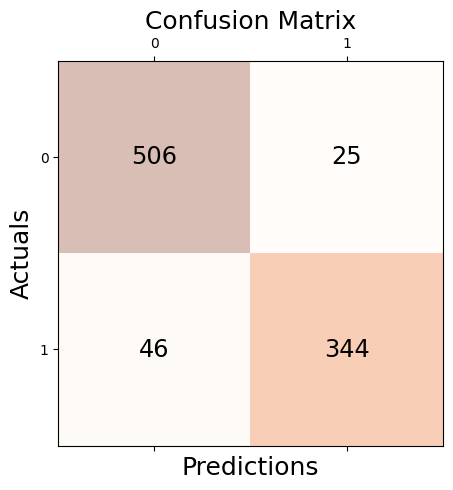

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

Precision: 0.932
Recall: 0.882
Accuracy: 0.923
F1 Score: 0.906


         C  Accuracy
0    0.001  0.865364
1    0.100  0.925081
2    1.000  0.922910
3   10.000  0.918567
4  100.000  0.913138


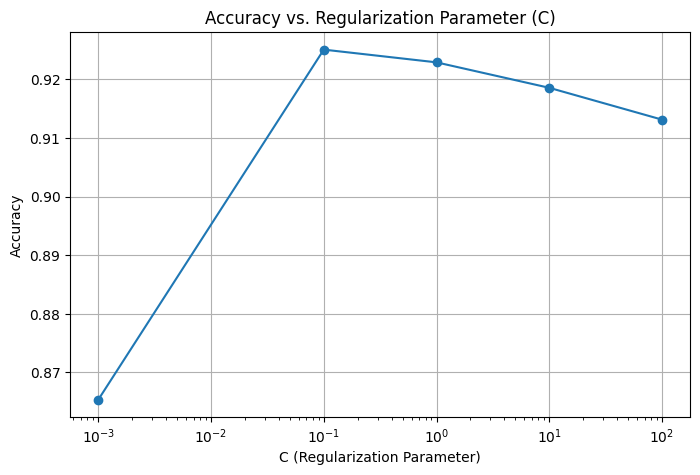

In [ ]:
#Regularization
import matplotlib.pyplot as plt

# Values for regularization parameter (C)
C_values = [0.001, 0.1, 1, 10, 100]
accuracy_scores = []

for C in C_values:
    svm_model = SVC(kernel='linear', C=C)
    svm_model.fit(X_train, y_train.values.ravel())
    accuracy = svm_model.score(X_test, y_test)
    accuracy_scores.append(accuracy)

# Tabularize and plot the accuracy scores
import pandas as pd

results = pd.DataFrame({'C': C_values, 'Accuracy': accuracy_scores})
print(results)

# Plot the accuracy scores
plt.figure(figsize=(8, 5))
plt.semilogx(C_values, accuracy_scores, marker='o')
plt.title('Accuracy vs. Regularization Parameter (C)')
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

Question 1 Part B

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create SVM classifiers with different kernels
kernels = ['poly', 'poly', 'sigmoid', 'rbf']
degrees = [2, 3, None, None]  # Degree parameter for polynomial kernels

In [ ]:
# Initialize lists to store the evaluation metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

In [ ]:
for kernel, degree in zip(kernels, degrees):
    if kernel == 'poly':
        svm_model = SVC(kernel=kernel, degree=degree, C=0.1)
    else:
        svm_model = SVC(kernel=kernel, C=0.1)

    svm_model.fit(X_train, y_train.values.ravel())
    y_pred = svm_model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    print({'Kernel': kernel, 'Accuracy': accuracy})
    precision = precision_score(y_test, y_pred, average='weighted')
    print({'Kernel': kernel, 'Precision': precision})
    recall = recall_score(y_test, y_pred, average='weighted')
    print({'Kernel': kernel, 'Recall': recall})
    f1 = f1_score(y_test, y_pred, average='weighted')
    print({'Kernel': kernel, 'F1-Score': f1})

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

{'Kernel': 'poly', 'Accuracy': 0.6264929424538545}
{'Kernel': 'poly', 'Precision': 0.730385776195585}
{'Kernel': 'poly', 'Recall': 0.6264929424538545}
{'Kernel': 'poly', 'F1-Score': 0.5325731229967159}
{'Kernel': 'poly', 'Accuracy': 0.6199782844733985}
{'Kernel': 'poly', 'Precision': 0.7229096306736186}
{'Kernel': 'poly', 'Recall': 0.6199782844733985}
{'Kernel': 'poly', 'F1-Score': 0.5205499137765855}
{'Kernel': 'sigmoid', 'Accuracy': 0.6384364820846905}
{'Kernel': 'sigmoid', 'Precision': 0.6350074924973108}
{'Kernel': 'sigmoid', 'Recall': 0.6384364820846905}
{'Kernel': 'sigmoid', 'F1-Score': 0.6358983567127374}
{'Kernel': 'rbf', 'Accuracy': 0.6558089033659066}
{'Kernel': 'rbf', 'Precision': 0.6551249224976002}
{'Kernel': 'rbf', 'Recall': 0.6558089033659066}
{'Kernel': 'rbf', 'F1-Score': 0.635918298756868}


Question 1 Part C

In [ ]:
from sklearn.svm import SVC
import pandas as pd

# Define a list of polynomial degrees and C values to explore
degrees = [1, 1, 3, 3]
C_values = [0.01, 100, 0.01, 100]

# Initialize lists to store the results
results = []

for degree, C in zip(degrees, C_values):
    # Create an SVM model with a polynomial kernel
    svm_model = SVC(kernel='poly', degree=degree, C=C)
    svm_model.fit(X_train, y_train.values.ravel())

    # Predict on the test set
    y_pred = svm_model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Store the results in a dictionary
    result = {
        'Degree': degree,
        'C': C,
        'Accuracy': accuracy
    }
    results.append(result)

# Create a DataFrame to display the results
results_df = pd.DataFrame(results)
print(results_df)


   Degree       C  Accuracy
0       1    0.01  0.621064
1       1  100.00  0.760043
2       3    0.01  0.611292
3       3  100.00  0.660152
